# **BLACK FRIDAY SALES DATA- EDA**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os

# Create the folder if it doesn't exist
if not os.path.exists("images"):
    os.makedirs("images")


**LOADING AND UNDERSTANDING THE DATA**

In [3]:
df=pd.read_csv('/content/BlackFriday.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [4]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161580 entries, 0 to 161579
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     161580 non-null  int64  
 1   Product_ID                  161580 non-null  object 
 2   Gender                      161580 non-null  object 
 3   Age                         161580 non-null  object 
 4   Occupation                  161580 non-null  int64  
 5   City_Category               161580 non-null  object 
 6   Stay_In_Current_City_Years  161580 non-null  object 
 7   Marital_Status              161580 non-null  int64  
 8   Product_Category_1          161580 non-null  int64  
 9   Product_Category_2          111461 non-null  float64
 10  Product_Category_3          49443 non-null   float64
 11  Purchase                    161579 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 14.8+ MB


In [5]:
df.shape

(161580, 12)

**DATA CLEANING**


In [6]:
## FINDING THE NO OF NULL VALUES IN THE DATASET
df.isna().sum()


,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,50119


In [7]:
## DEALING WITH NULL VALUES
del df['Product_Category_2']   ## Dropping all the rows would drastically shrink the dataset and there will be huge data loss.
del df['Product_Category_3']   ## Dropping these 2 columns seems more feasible as they majorly contain null values.

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0


**DATA OVERVIEW**

In [9]:
df.shape

(161580, 10)

In [10]:
df.nunique()

,0
User_ID,5883
Product_ID,3432
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category_1,18
Purchase,15252


In [11]:
df.dtypes   ## THE DATATYPES OF ALL THE COLUMNS

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Purchase,float64


In [12]:
print('There are',df['User_ID'].nunique(),'no of distinct users')

There are 5883 no of distinct users


In [13]:
print('There are',df['Product_ID'].nunique(),'no of distinct products')

There are 3432 no of distinct products


In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Purchase'],
      dtype='object')

# **UNIVARIATE ANALYSIS**

In [15]:
## ANALYZING DIFFERENT COLUMNS
for column in df.columns:
  print(column,':',df[column].nunique())


User_ID : 5883
Product_ID : 3432
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 15252


### 1)THE GENDER COLUMN ANALYSIS

In [16]:
## COUNTING THE NO OF MALES AND FEMALES
df['Gender']
df_1=df[df['Gender']=='M']
df_2=df[df['Gender']=='F']
print('There are ',len(df_1),'no of males');
print('There are ',len(df_2),'no of females');

There are  121876 no of males
There are  39704 no of females


In [17]:
data=pd.DataFrame({'Ratio':[len(df[df['Gender']=='M']),len(df[df['Gender']=='F'])]},index=['Male','Female'])
data

,Ratio
Male,121876
Female,39704


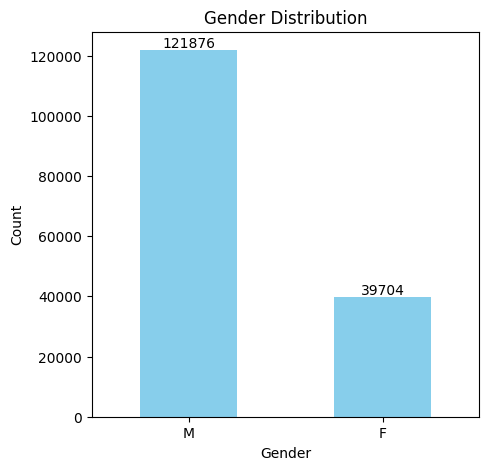

In [18]:
# BAR PLOT TO VISUALIZE THE GENDER RATIO
plt.figure(figsize=(5,5))

gender_counts = df['Gender'].value_counts()
ax = gender_counts.plot(kind='bar', color='skyblue')
for i, value in enumerate(gender_counts):
    plt.text(i, value + 10, str(value), ha='center', va='bottom')

plt.title("Gender Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.savefig('images/gender_distribution.png')
plt.show()


The no of males in the dataset is significantly higher as compared to the no of females.

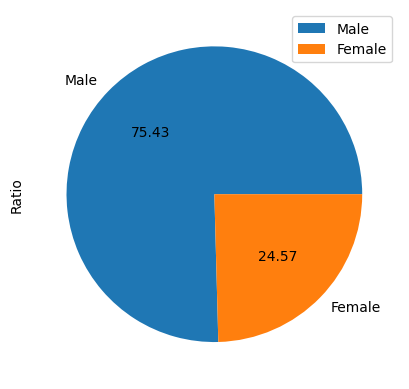

In [19]:
## PIE CHART FOR VISUALIZATION USING PANDAS
data.plot(kind='pie',y='Ratio',autopct='%.2f')
plt.show()

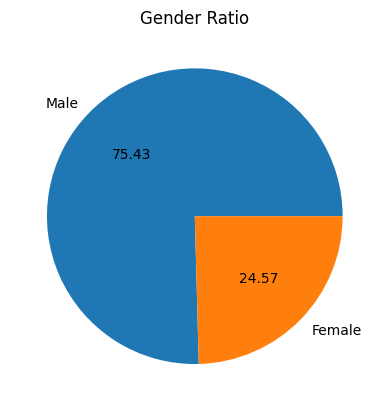

In [20]:
## USING MATPLOTLIB FOR PIE CHART VISUALIZATION
plt.pie(x=data['Ratio'], labels=data.index, autopct='%.2f')
plt.title('Gender Ratio')
plt.show()

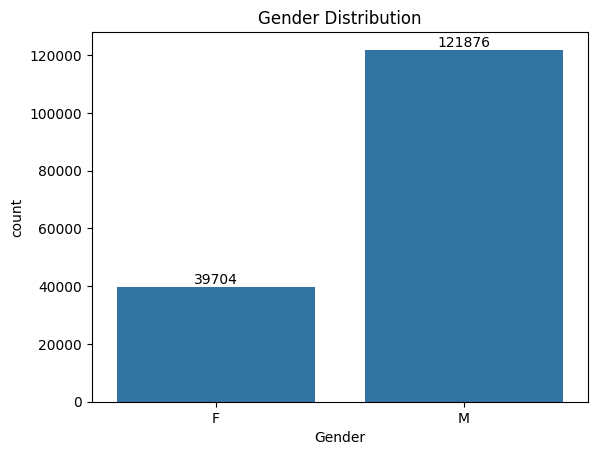

In [21]:
ax=sns.countplot(x='Gender',data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.title("Gender Distribution")
plt.show()

In [22]:
df.groupby('Gender').size()

,0
Gender,
F,39704
M,121876


### ANALYZING THE PURCHASE COLUMN

In [23]:

df['Purchase'].astype(float)
print(df['Purchase'].dtype)



float64


In [24]:
if df['Purchase'].dtype == 'object':
    # If it's an object type, assume it contains strings and try the replacement
    df['Purchase'] = df['Purchase'].str.replace(',', '').astype(float)
elif df['Purchase'].dtype in ['int64', 'float64']:
    # If it's already numeric, no need for str.replace
    print("Purchase column is already numeric. Skipping string replacement.")
else:
    # Handle other data types if necessary
    print(f"Purchase column has unexpected dtype: {df['Purchase'].dtype}")
    # You might need to investigate the column content further

# After successful conversion (or if it was already numeric), you can proceed
print(df['Purchase'].dtype)


Purchase column is already numeric. Skipping string replacement.
float64


In [25]:
df['Purchase'] = pd.to_numeric(df['Purchase'], errors='coerce')


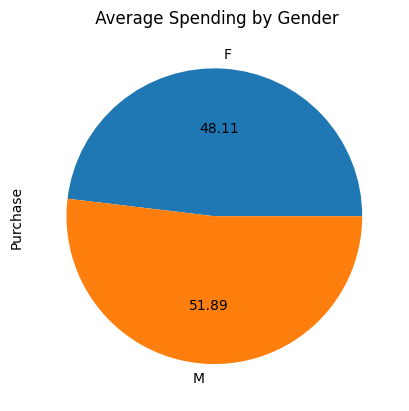

In [26]:
## AVERAGE SPENDING BY GENDER
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct='%.2f')
plt.title(' Average Spending by Gender')
plt.savefig('images/Average_Spending_Gender.png')
plt.show()

In [27]:
## PURCHASING TREND BETWEEN MEN AND WOMEN
x=df.shape[0]
females_percent=(len(df[df['Gender']=='F'])/x)*100
print('The percent of females in the dataset are:',females_percent,'%')
males_percent=(len(df[df['Gender']=='M'])/x)*100
print('The percent of males in the dataset are:',males_percent,'%')
amt=df['Purchase'].sum()
amt_females=df[df['Gender']=='F']['Purchase'].sum()
amt_males=df[df['Gender']=='M']['Purchase'].sum()
print('The total amount spent by females are:',amt_females)
print('The total amount spent by males are:',amt_males)
f=amt_females/amt
m=amt_males/amt
print('The percent of total amt spent on purchases by females are:',f*100,'%')
print('The percent of total amt spent on purchases by males are:',m*100,'%')





The percent of females in the dataset are: 24.57234806287907 %
The percent of males in the dataset are: 75.42765193712093 %
The total amount spent by females are: 349092249.0
The total amount spent by males are: 1155700262.0
The percent of total amt spent on purchases by females are: 23.198696594257573 %
The percent of total amt spent on purchases by males are: 76.80130340574243 %


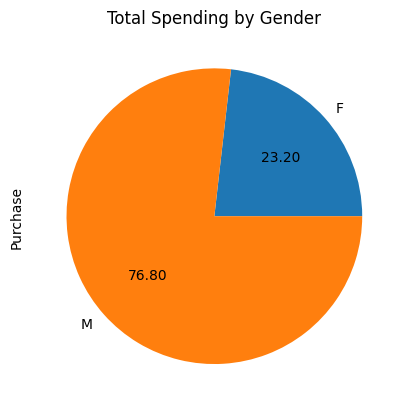

In [28]:
## TOTAL SPENDING BY GENDER
df.groupby('Gender')['Purchase'].sum().plot(kind='pie',autopct='%.2f')
plt.title('Total Spending by Gender')
plt.show()

### Males are spending much more as compared to females.

**ANALYZING THE AGE VARIABLE**

In [29]:
## ANALYZING THE AGE VARIABLE
df.groupby('Age').size()

,0
Age,
0-17,4378
18-25,29721
26-35,64327
36-45,32210
46-50,13312
51-55,11374
55+,6258


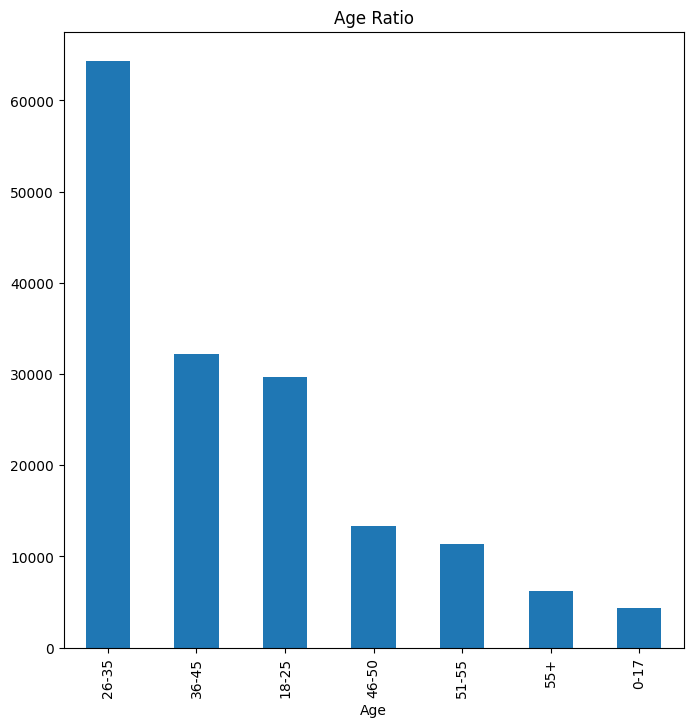

In [30]:
## THE AGE RATIO
plt.figure(figsize=(8,8))
df.groupby('Age').size().sort_values(ascending=False).plot(kind='bar',title='Age Ratio')
plt.savefig('images/Age_Ratio.png')
plt.show()

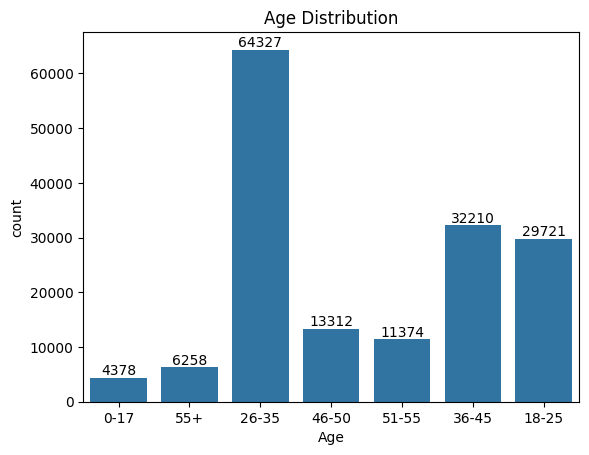

In [31]:
ax=sns.countplot(x='Age',data=df)
for container in ax.containers:
    ax.bar_label(container)

plt.title("Age Distribution")
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161580 entries, 0 to 161579
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     161580 non-null  int64  
 1   Product_ID                  161580 non-null  object 
 2   Gender                      161580 non-null  object 
 3   Age                         161580 non-null  object 
 4   Occupation                  161580 non-null  int64  
 5   City_Category               161580 non-null  object 
 6   Stay_In_Current_City_Years  161580 non-null  object 
 7   Marital_Status              161580 non-null  int64  
 8   Product_Category_1          161580 non-null  int64  
 9   Purchase                    161579 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 12.3+ MB


In [33]:
## NO OF PRODUCTS BOUGHT BY EACH AGE GROUP
lst=[]
for i in df['Age'].unique():
  lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
print(lst)
df_1=pd.DataFrame(lst,columns=['Age','Products'])


[['0-17', 1562], ['55+', 1824], ['26-35', 3131], ['46-50', 2504], ['51-55', 2242], ['36-45', 2914], ['18-25', 2672]]


In [34]:
df_1.sort_values(by='Products',ascending=False,inplace=True)

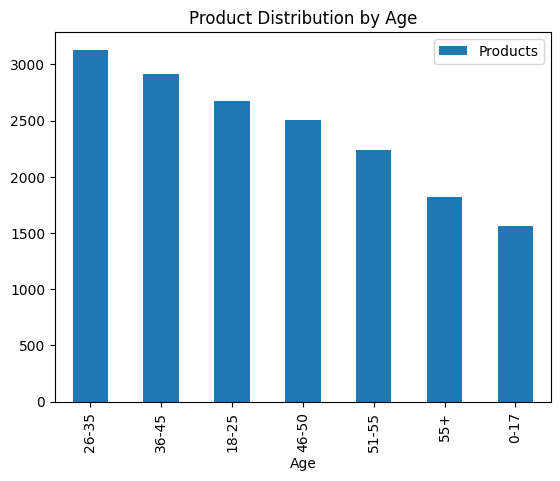

In [35]:
df_1.plot(kind='bar',x='Age',y='Products',title='Product Distribution by Age')

plt.show()

Through the above graph we can infer that majourity of the customers lie in the age group of 26-35. The  customers in the age group 26-35 form the most significant subgroup.


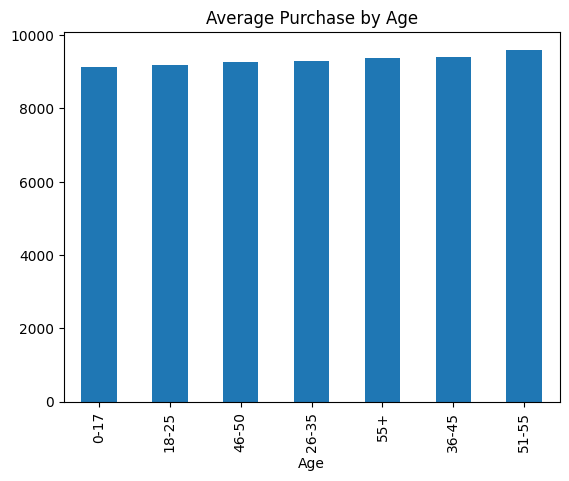

In [36]:
## AVERAGE PURCHASE BY DIFFERENT AGE GROUPS
df.groupby('Age')['Purchase'].mean().sort_values(ascending=True).plot(kind='bar',title='Average Purchase by Age')
plt.savefig('images/Avg_Purchase_Age.png')
plt.show()

People in the age group 26-35 have the highest purchasing power and are spending quite a lot.
The future products should be designed keeping in mind their preferences and choices.

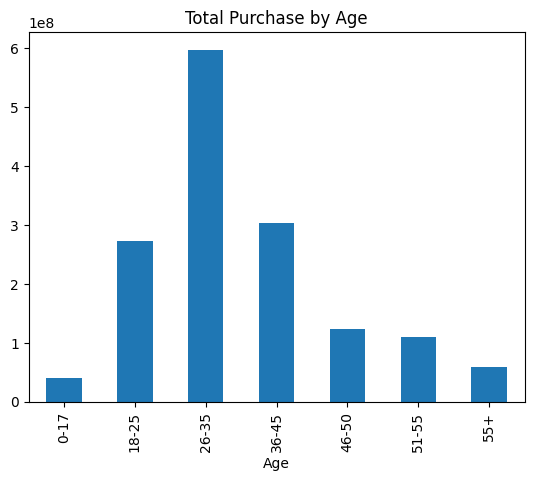

In [37]:
## TOTAL PURCHASE BY AGE
x=df.groupby('Age')['Purchase'].sum().plot(kind='bar',title='Total Purchase by Age')
plt.savefig('images/Total_Purchase_Age.png')
plt.show()

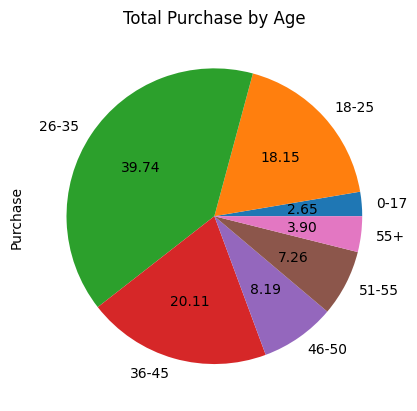

In [38]:
df.groupby('Age')['Purchase'].sum().plot(kind='pie',autopct='%.2f',title='Total Purchase by Age')
plt.show()

**MARITAL STATUS ANALYSIS**

In [39]:
## ANALZING THE MARITAL STATUS
df.groupby('Marital_Status').size()

,0
Marital_Status,
0,95341
1,66239


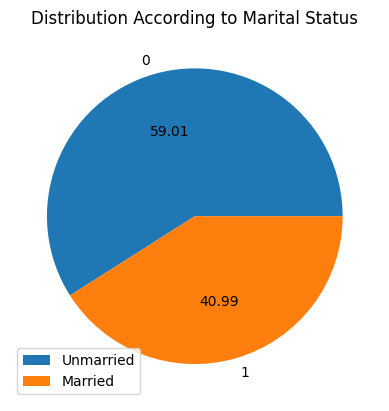

In [40]:
df.groupby('Marital_Status').size().plot(kind='pie', autopct='%.2f',subplots=True)
plt.legend(['Unmarried','Married'])
plt.title('Distribution According to Marital Status')
plt.show()

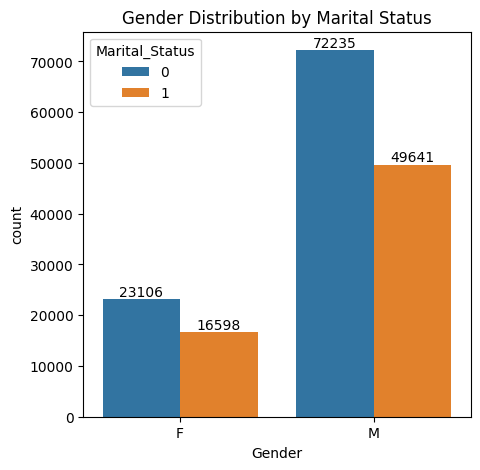

In [41]:
## GENDER DISTRIBUTION BY MARITAL STATUS
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Gender',hue='Marital_Status',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gender Distribution by Marital Status')
plt.savefig('images/Gender_Maritalstatus.png')
plt.show()

In [42]:
## WHO IS SPENDING MORE - MARRIED OR UNMARRIED SEGMENTS
df.groupby('Marital_Status')['Purchase'].mean()


,Purchase
Marital_Status,
0,9305.044388
1,9324.561037


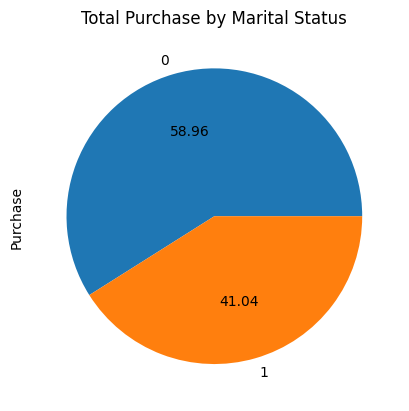

In [43]:
df.groupby('Marital_Status')['Purchase'].sum().plot(kind='pie',autopct='%.2f',title='Total Purchase by Marital Status')
plt.show()

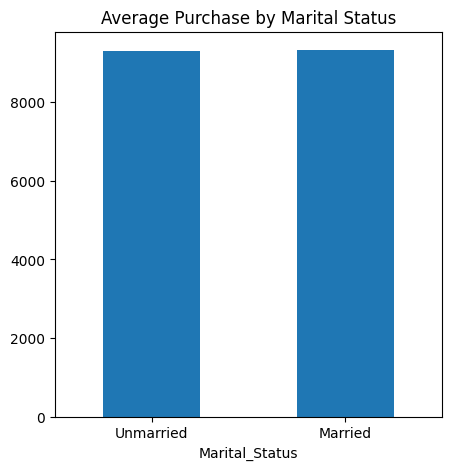

In [44]:
plt.figure(figsize=(5,5))
df.groupby('Marital_Status')['Purchase'].mean().plot(kind='bar',title='Average Purchase by Marital Status')
plt.xticks([0.0,1.0],['Unmarried','Married'])
plt.xticks(rotation=0)
plt.show()

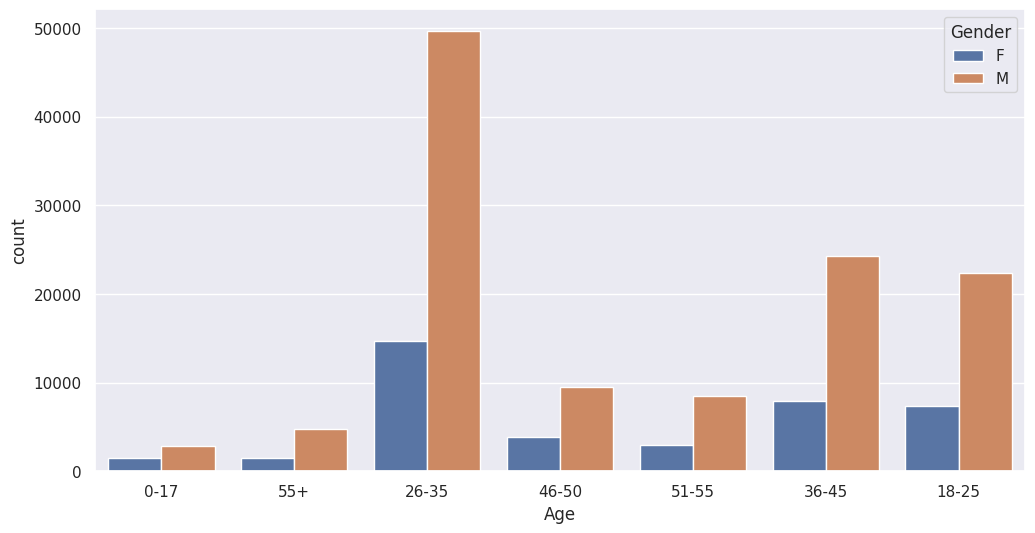

In [45]:
## GENDER AND AGE
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)
plt.show()

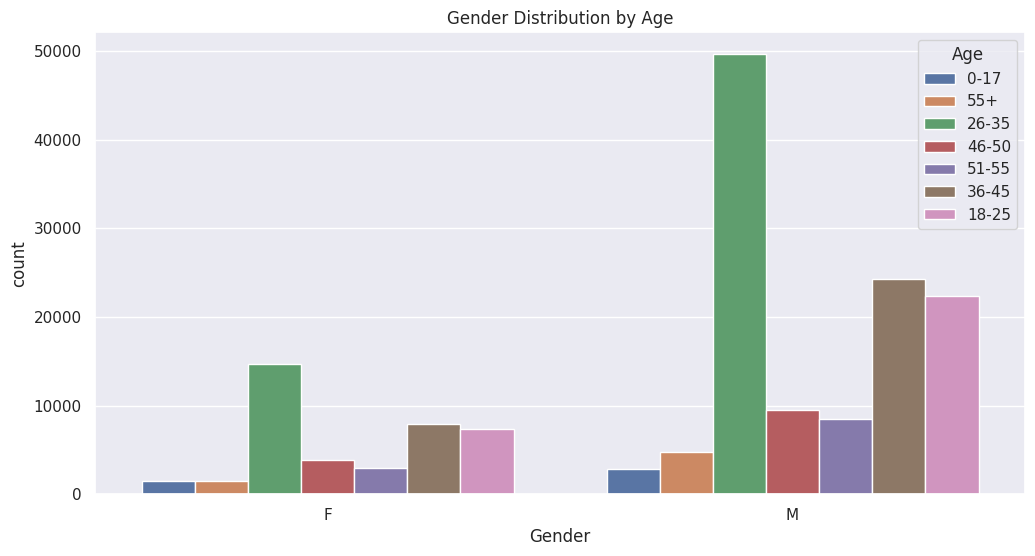

In [46]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)
plt.title('Gender Distribution by Age')
plt.savefig('images/GenderDistribution_Age.png')
plt.show()

**ANALYZING THE CITY CATEGORY COLUMN**

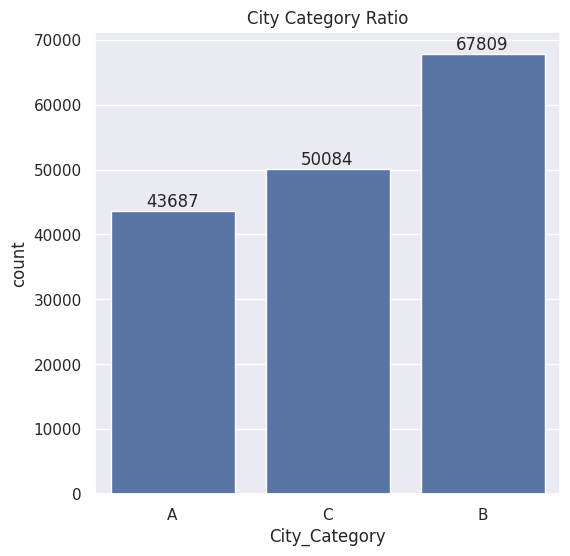

In [47]:
## CITY CATEGORY RATIO
sns.set(rc = {'figure.figsize' : (6,6)})
ax=sns.countplot(x=df['City_Category'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('City Category Ratio')
plt.savefig('images/CityCategory_Ratio.png')
plt.show()

Most no of customers are from City B

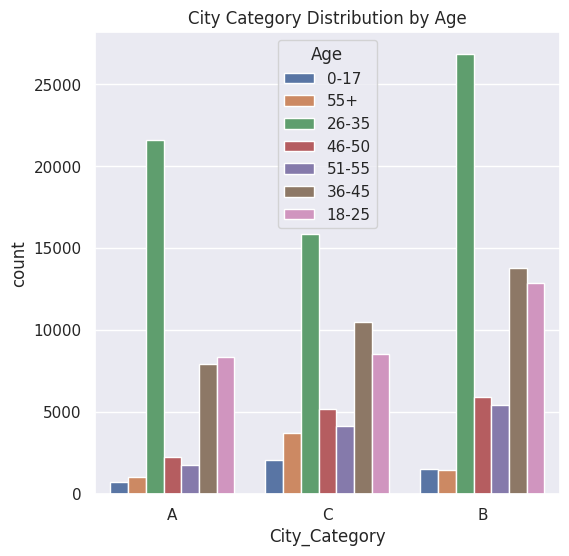

In [48]:
# CITY CATEGORY DISTRIBUTION BY AGE
sns.countplot(x = 'City_Category', hue = 'Age', data = df)
plt.title('City Category Distribution by Age')
plt.savefig('images/Citycategory_Age.png')
plt.show()

In all cities maximum no of the customers are in the age group 26-35

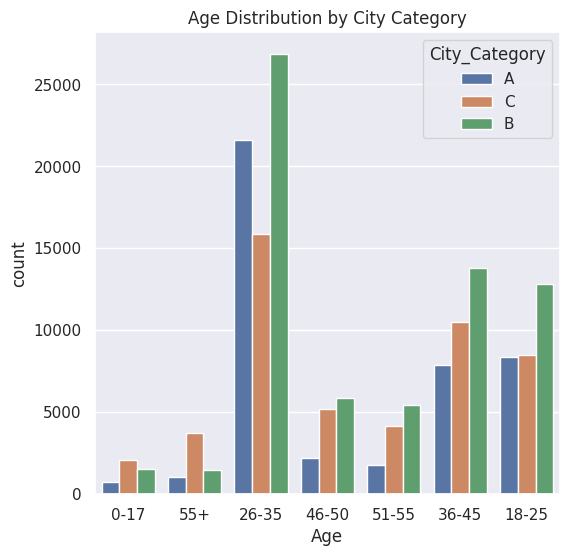

In [49]:

sns.set(rc = {'figure.figsize' : (6,6)})
ax=sns.countplot(x = 'Age', hue = 'City_Category', data = df)
plt.title('Age Distribution by City Category')
plt.show()

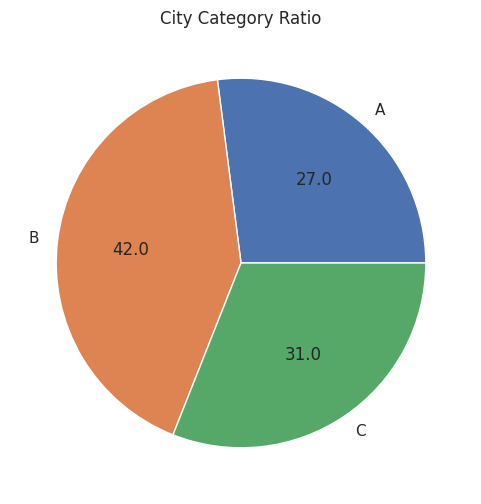

In [50]:
## CITY CATEGORY DISTRIBUTION
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f',figsize=(6,6))
plt.title('City Category Ratio')
plt.show()

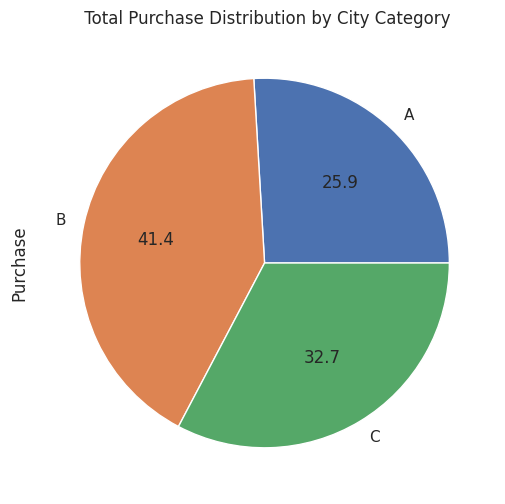

In [51]:
## TOTAL PURCHASE DISTRIBUTION BY CITY CATEGORY
df.groupby('City_Category')['Purchase'].sum().plot(kind = 'pie', autopct = "%0.1f", title=' Total Purchase Distribution by City Category')
plt.savefig('images/TotalPurchase_City.png')
plt.show()

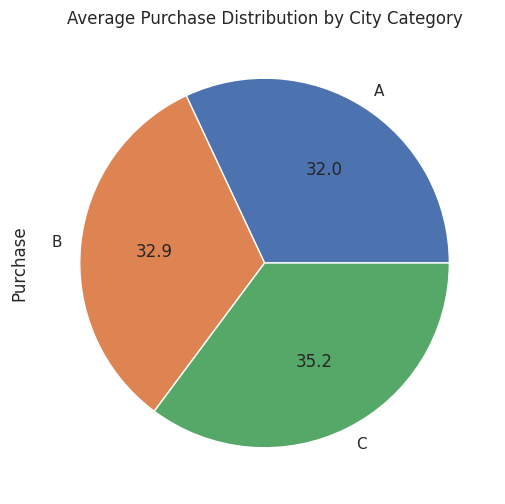

In [52]:
## AVERAGE PURCHASE DISTRIBUTION BY CITY CATEGORY
df.groupby('City_Category')['Purchase'].mean().plot(kind = 'pie', autopct = "%0.1f", title='Average Purchase Distribution by City Category')
plt.show()

The average amt spent is highest in **City C** probably because the customers of City C are buying costlier products and spending more as compared to City B.

**MARITAL GENDER**

In [53]:
## ANALYZING GENDER AND MARITAL STATUS
l=[]
for i in range(len(df)):
  l.append(df['Gender'][i]+'_'+str(df['Marital_Status'][i]))
print(l)

['F_0', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'F_0', 'F_0', 'F_0', 'F_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_0', 'M_0', 'M_0', 'M_0', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_1', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'F_1', 'F_1', 'M_0', 'M_0', 'M_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'F_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'F_1', 'F_1', 'F_1', 'M_0', 'M_0', 'M_0', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1', 'M_1'

In [54]:
df['Marital_Gender']=l

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370.0,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200.0,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422.0,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057.0,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969.0,M_0


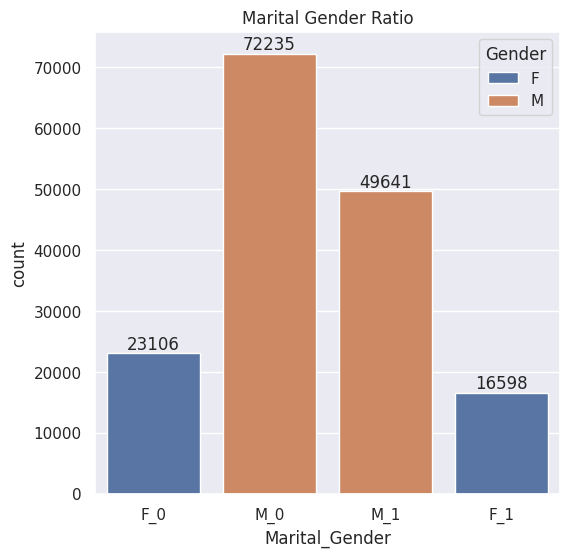

In [78]:
## MARITAL GENDER RATIO
ax=sns.countplot(x='Marital_Gender',hue='Gender',data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.title('Marital Gender Ratio')
plt.savefig('images/MaritalGender_Ratio.png')
plt.show()

Unmarried males form the largest section of the customers.

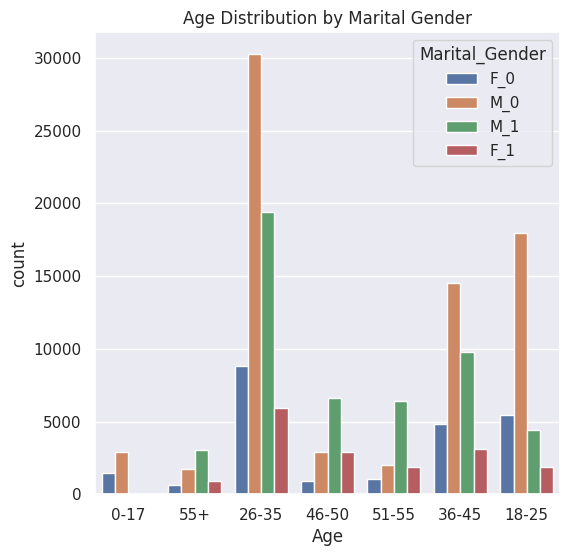

In [57]:
## Age Distribution by Marital Gender
sns.countplot(x='Age',hue='Marital_Gender',data=df)
plt.title('Age Distribution by Marital Gender')
plt.show()

**ANALYZING THE PRODUCT CATEGORY AND OCCUPATION**

In [58]:
df['Product_Category_1']

,Product_Category_1
0,3
1,1
2,12
3,12
4,8
...,...
161575,6
161576,6
161577,5
161578,8


<Axes: xlabel='City_Category', ylabel='count'>

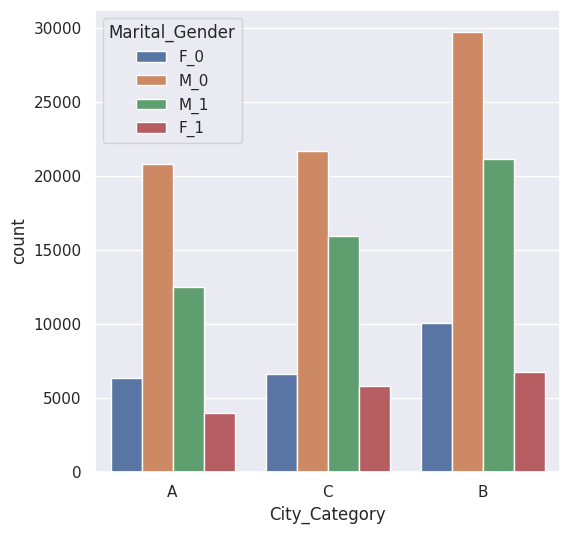

In [60]:
## CITY CATEGORY AND MARITAL GENDER PLOT
sns.countplot(x = df['City_Category'], hue = df['Marital_Gender'])

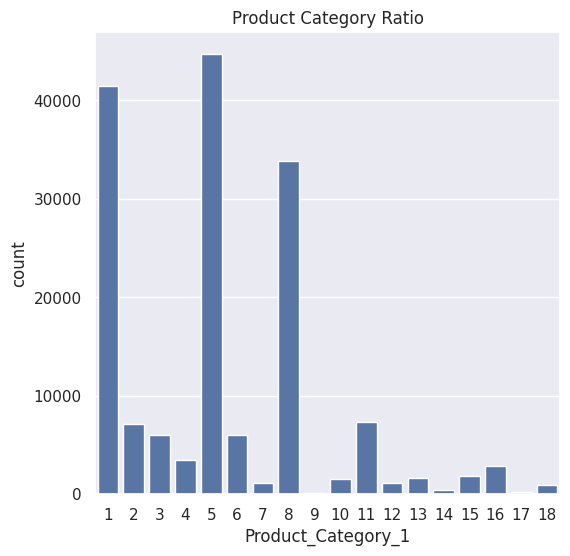

In [59]:
ax=sns.countplot(x = df['Product_Category_1'])
plt.title('Product Category Ratio')
plt.show()

In [61]:
df['Occupation'].nunique()


21

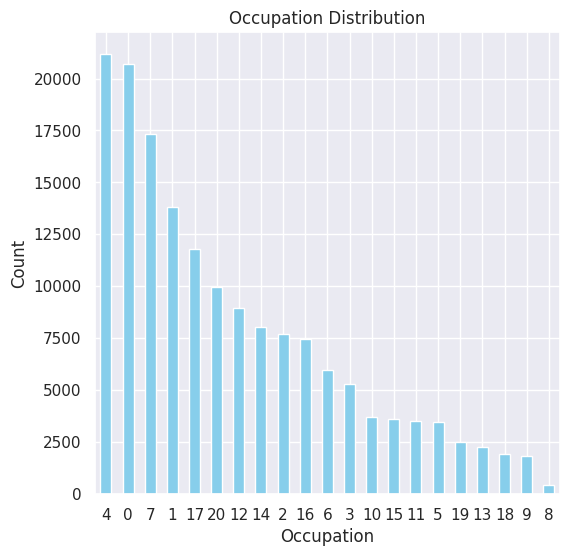

In [62]:
# OCCUPATION AND PRODUCT ANALYSIS
Occupation_Ratio=df['Occupation'].value_counts()
ax = Occupation_Ratio.plot(kind='bar', color='skyblue')
plt.title('Occupation Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

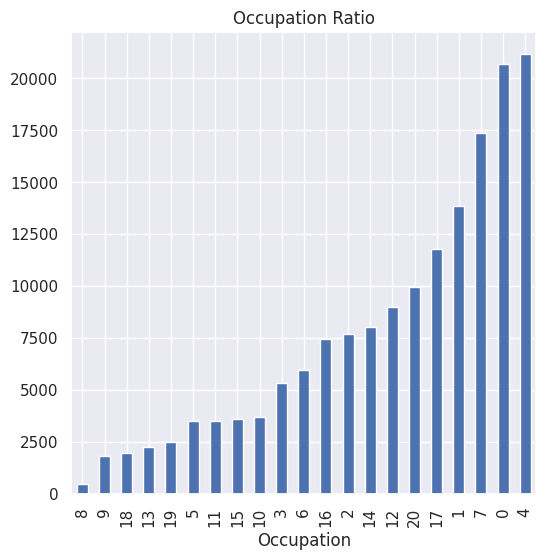

In [63]:
df.groupby('Occupation').size().sort_values().plot(kind='bar',title='Occupation Ratio')
plt.show()

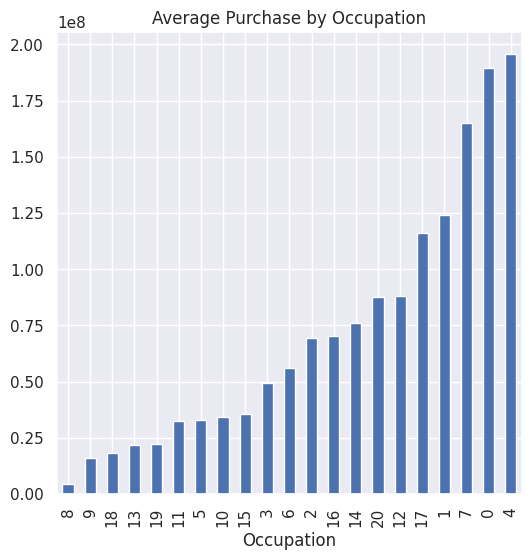

In [77]:
df.groupby('Occupation')['Purchase'].sum().sort_values().plot(kind='bar',title='Average Purchase by Occupation')
plt.show()

<Axes: xlabel='Occupation', ylabel='count'>

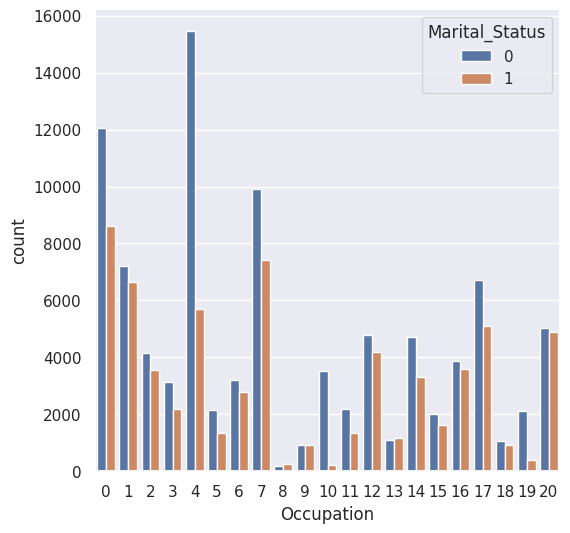

In [65]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

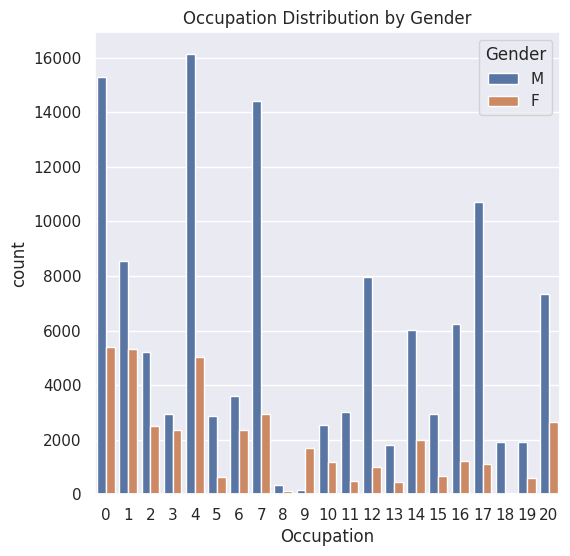

In [66]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)
plt.title('Occupation Distribution by Gender')
plt.show()

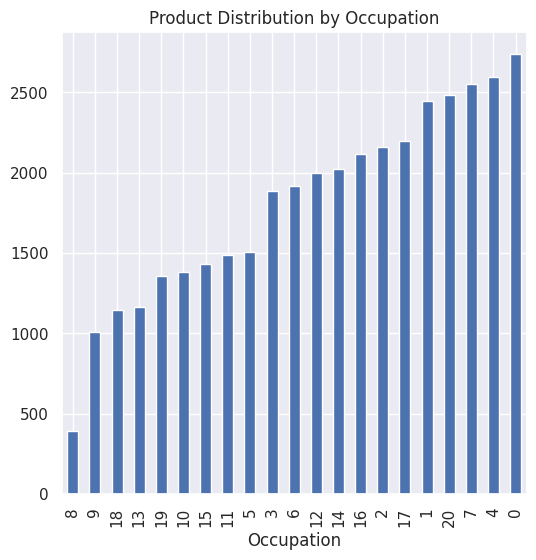

In [67]:
df.groupby('Occupation')['Product_ID'].nunique().sort_values().plot(kind='bar',title='Product Distribution by Occupation')
plt.show()

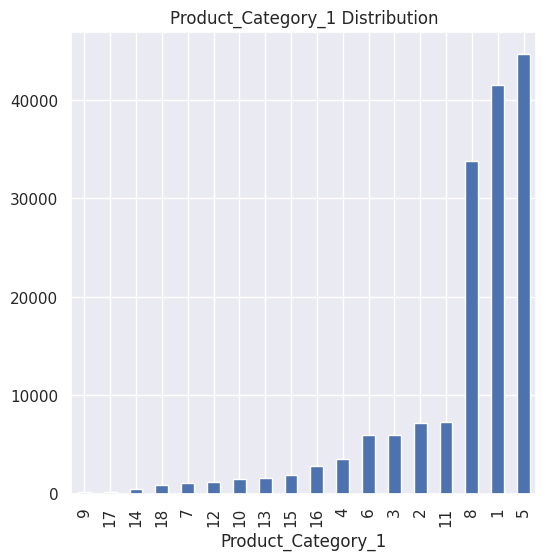

In [68]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')
plt.title('Product_Category_1 Distribution')
plt.show()

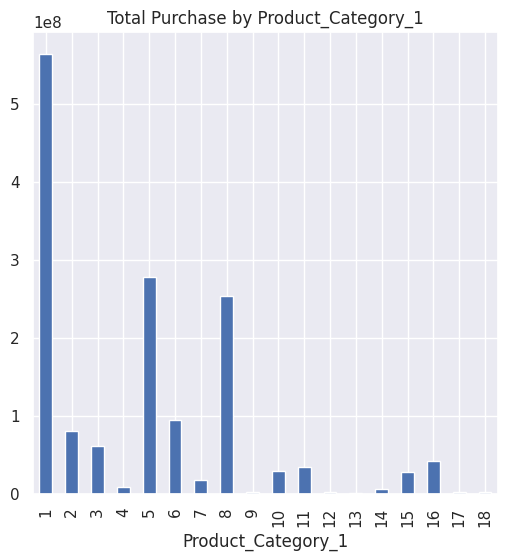

In [69]:
df.groupby('Product_Category_1')['Purchase'].sum().plot(kind = 'bar')
plt.title('Total Purchase by Product_Category_1')
plt.show()

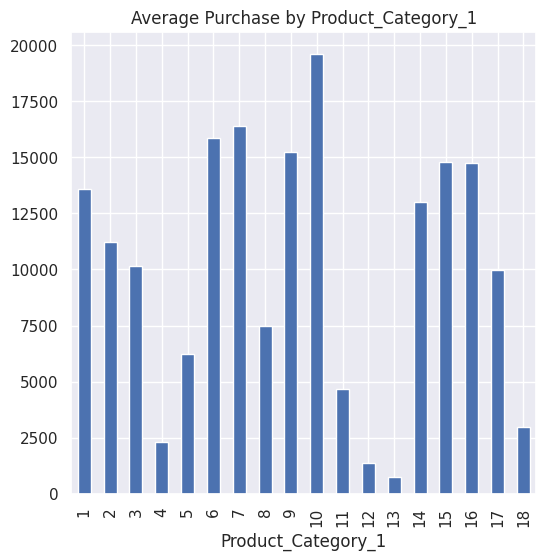

In [70]:
df.groupby('Product_Category_1')['Purchase'].mean().plot(kind = 'bar')
plt.title('Average Purchase by Product_Category_1')
plt.show()

In [71]:
df.groupby('Product_ID').size().nlargest(10)

,0
Product_ID,
P00025442,510
P00265242,488
P00112142,481
P00110742,474
P00184942,452
P00057642,431
P00046742,428
P00058042,423
P00110942,423


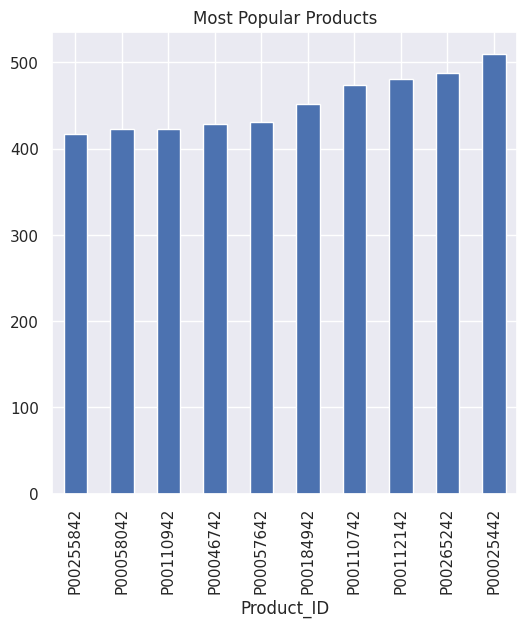

In [72]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')
plt.title('Most Popular Products')
plt.show()


Product with ID **P00025442** is the most popular product among the customers and it is most sought after product.

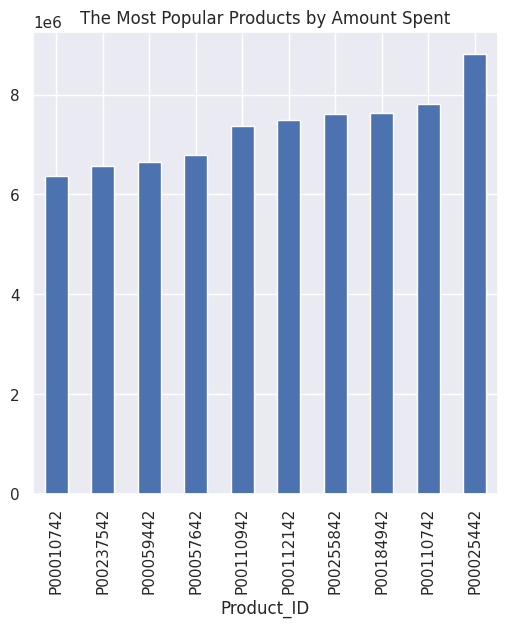

In [73]:
df.groupby('Product_ID')['Purchase'].sum().nlargest(10).sort_values().plot(kind = 'bar',title='The Most Popular Products by Amount Spent')
plt.show()

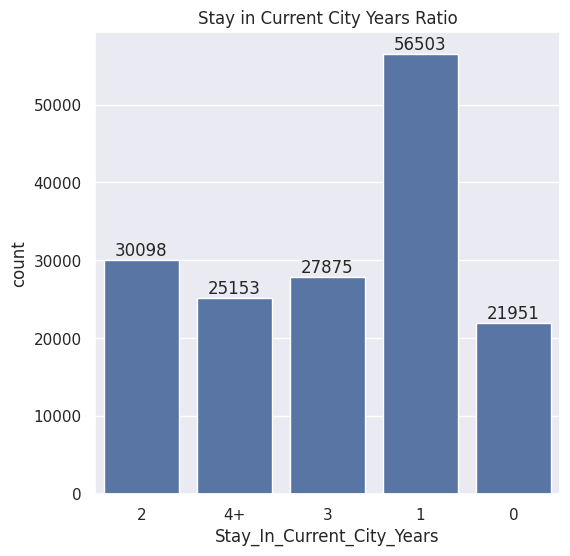

In [74]:
## Stay_In_Current_City_Years Analysis
ax=sns.countplot(x = df['Stay_In_Current_City_Years'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Stay in Current City Years Ratio')
plt.show()

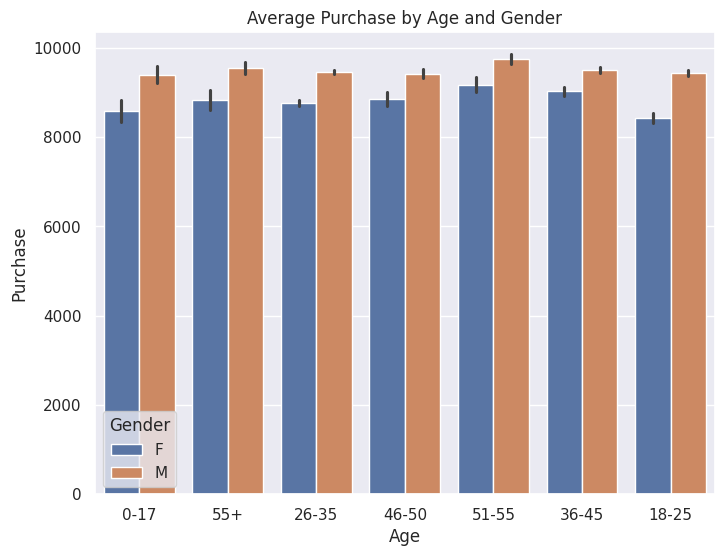

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df, estimator='mean')
plt.title('Average Purchase by Age and Gender')
plt.show()

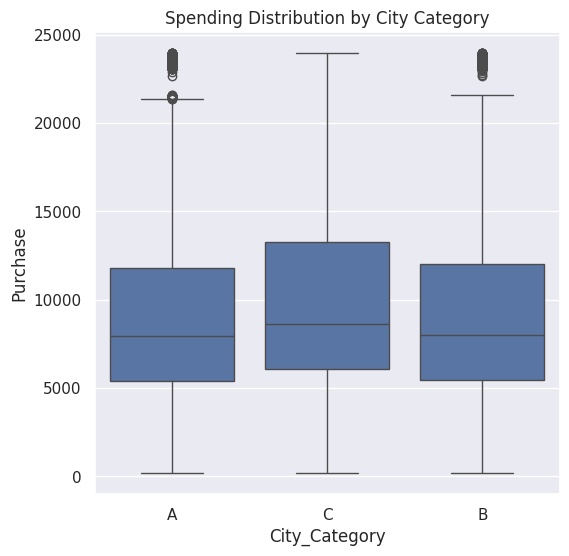

In [79]:
sns.boxplot(x='City_Category', y='Purchase', data=df)
plt.title('Spending Distribution by City Category')
plt.savefig('images/SpendingDistribution_City_Boxplot.png')


# **CONCLUSION**

**Majority of buyers are males from the 26–35 age group.**

**Males tend to spend more than females on average**.

**Unmarried males form the largest section of the customers.**

**Occupation and city category influence spending behavior — buyers from City B and City C show higher purchase values.**

**Marital status and stay duration can slightly influence purchase patterns.**